# 1. Sourcing and Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [2]:
#!pip install watermark

#once it is installed, you'll just need this in the future notebook
%load_ext watermark

In [3]:
%watermark -d -t -v -p numpy,pandas -g

2020-11-26 09:05:21 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
pandas 1.1.4
Git hash:


In [4]:
winddata = pd.read_csv("Data/T1.csv")

# 2.  Data Transformation.  

We have too many datapoint, so I want to restrict our data to only one month of data (July), and I will change the measurements to every hour as opposed to every 10 minutes

In [5]:
winddata.shape

(50530, 5)

In [6]:
winddata.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [7]:
winddata.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


# Speed vs Power

Intersting to see the correlation here.  It shows that the wind speed is much more variable, but that generally speaking that there is a slowly building power increase of power with wind speed, but at the same time, bursts of wind are leading to more active power.  

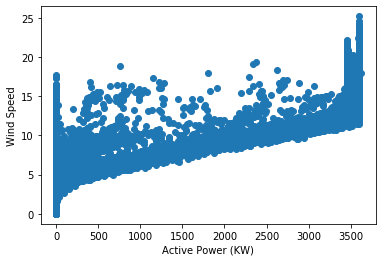

In [8]:
plt.scatter(winddata['LV ActivePower (kW)'], winddata['Wind Speed (m/s)'])

plt.xlabel("Active Power (KW)")
plt.ylabel("Wind Speed")

plt.show()

In [9]:
correlatoin = winddata['LV ActivePower (kW)'].corr(winddata['Wind Speed (m/s)'])

print("Correlation is:", correlatoin)


Correlation is: 0.9127742911275553


Luckily there is no correlation between wind direction and active power, so we don't need to analyze wind direction.  This is because the wind turbine adjusts to the direction of the wind.

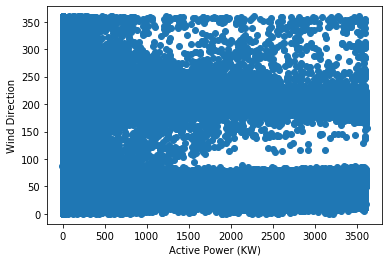

In [10]:
plt.scatter(winddata['LV ActivePower (kW)'], winddata['Wind Direction (°)'])

plt.xlabel("Active Power (KW)")
plt.ylabel("Wind Direction")

plt.show()

In [11]:
winddata.isnull().values.any()
winddata.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [12]:
winddata.set_index('Date/Time', inplace = True)

In [13]:
winddata.index = pd.to_datetime(winddata.index)

In [14]:
winddata.index.dtype

dtype('<M8[ns]')

In [15]:
winddata.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [16]:
len(winddata)

50530

# How do I get this data to resample by hour?

In [17]:
windspeed = winddata['Wind Speed (m/s)']

In [18]:
resampled = windspeed.resample('1H').mean()



In [19]:
summarydata1 = winddata.between_time('0:05', '0:15')
summarydata2 = winddata.between_time('1:05', '1:15')
summarydata3 = winddata.between_time('2:05', '2:15')
summarydata4 = winddata.between_time('3:05', '3:15')
summarydata5 = winddata.between_time('4:05', '4:15')
summarydata6 = winddata.between_time('5:05', '5:15')
summarydata7 = winddata.between_time('6:05', '6:15')
summarydata8 = winddata.between_time('7:05', '7:15')
summarydata9 = winddata.between_time('8:05', '8:15')
summarydata10 = winddata.between_time('9:05', '9:15')
summarydata11 = winddata.between_time('10:05', '10:15')
summarydata12 = winddata.between_time('11:05', '11:15')
summarydata13 = winddata.between_time('12:05', '12:15')
summarydata14 = winddata.between_time('13:05', '13:15')
summarydata15 = winddata.between_time('14:05', '14:15')
summarydata16 = winddata.between_time('15:05', '15:15')
summarydata17 = winddata.between_time('16:05', '16:15')
summarydata18 = winddata.between_time('17:05', '17:15')
summarydata19 = winddata.between_time('18:05', '18:15')
summarydata20 = winddata.between_time('19:05', '19:15')
summarydata21 = winddata.between_time('20:05', '20:15')
summarydata22 = winddata.between_time('21:05', '21:15')
summarydata23 = winddata.between_time('22:05', '22:15')

In [20]:
summary = pd.concat([summarydata1,summarydata2,summarydata3,summarydata4,summarydata5,summarydata6,summarydata7,summarydata8,summarydata9,summarydata10,summarydata11,summarydata12,summarydata13,summarydata14,summarydata15,summarydata16,summarydata17,summarydata18,summarydata19,summarydata20,summarydata21,summarydata22,summarydata23])
len(summary)

8073

In [21]:
#summary = summary.sort_values(by='Date/Time')
summary.sort_index(inplace=True)

In [22]:
len(summary)

8073

In [23]:
len(resampled)

8760

In [24]:
print(resampled)

Date/Time
2018-01-01 00:00:00     5.506868
2018-01-01 01:00:00     5.644205
2018-01-01 02:00:00     6.452037
2018-01-01 03:00:00     6.811455
2018-01-01 04:00:00     7.748749
                         ...    
2018-12-31 19:00:00     6.481788
2018-12-31 20:00:00     8.083644
2018-12-31 21:00:00     9.121862
2018-12-31 22:00:00    11.340147
2018-12-31 23:00:00     9.855317
Freq: H, Name: Wind Speed (m/s), Length: 8760, dtype: float64


Here we make a predictor variable, y, but then I change it to be called "july".

In [25]:
m1 = resampled.index > '2018-07-01'
m2 = resampled.index < '2018-07-31'
m3 = resampled.index < '2018-08-09'
july = resampled[np.logical_and.reduce([m1, m2])]
Julyaug =  resampled[np.logical_and.reduce([m1, m3])]
Julyaug_log = np.log(Julyaug)
print(july)

Date/Time
2018-07-01 01:00:00    10.626840
2018-07-01 02:00:00    11.841422
2018-07-01 03:00:00    12.611197
2018-07-01 04:00:00    13.076755
2018-07-01 05:00:00    13.984995
                         ...    
2018-07-30 19:00:00     7.141817
2018-07-30 20:00:00     6.158737
2018-07-30 21:00:00     5.030241
2018-07-30 22:00:00     2.439380
2018-07-30 23:00:00     3.318539
Freq: H, Name: Wind Speed (m/s), Length: 719, dtype: float64


# 3.  Plotting the independent variable.

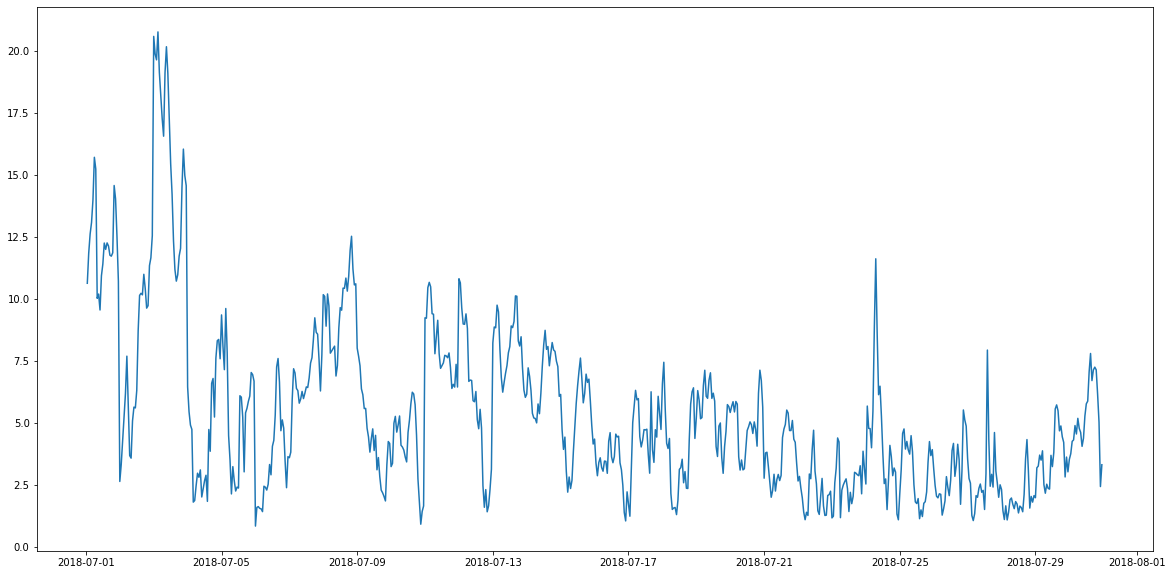

In [26]:
plt.figure(figsize=(20,10))

plt.plot(july)



In [27]:
print(len(july))

719


# What does the autocorrelation function look like for our dataset?

It looks like it is very positively correlated and that it is following something like a random walk.   I am also going to do some test to make the data stationary so we can better see the trends.

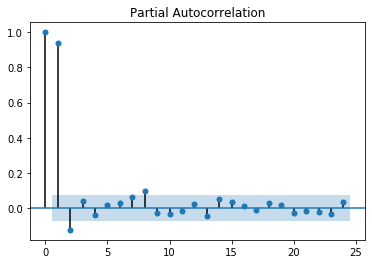

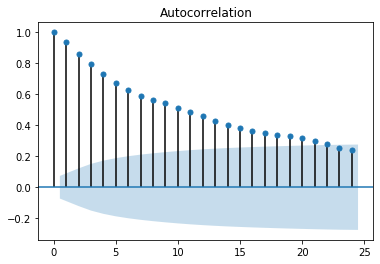

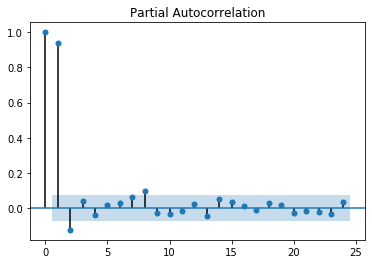

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(july, lags= 24, alpha=0.05)
plot_pacf(july, lags= 24, alpha=0.05)

#This is to determine the P and the Q

When I detrend the july time series, I can pass the window size and then use the .mean() method in order to make it stationary.  Then we should be able to better see what the seasonal period is within the data.

In [29]:
july2 = july - july.rolling(4).mean()


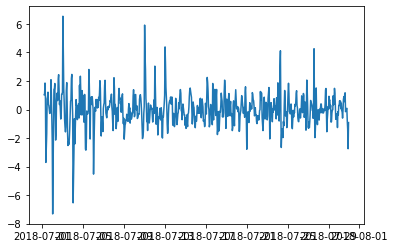

In [30]:
plt.plot(july2)

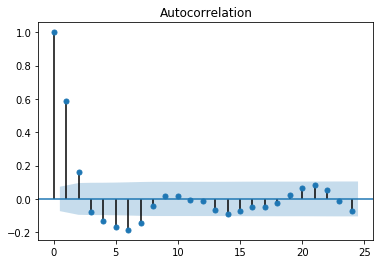

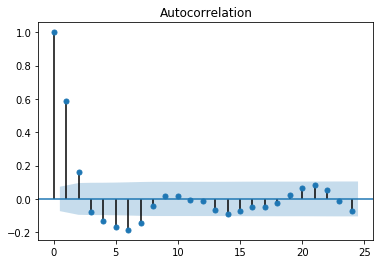

In [31]:
plot_acf(july2.dropna(), lags= 24, alpha=0.05)

In [32]:
#!python -m pip install statsmodels


# 3. Modelling

3a. Decomposition

What does it mean to decompose time series data? It means breaking that data into 3 components:

Trend: The overall direction that the data is travelling in (like upwards or downwards)
Seasonality: Cyclical patterns in the data
Noise: The random variation in the data
We can treat these components differently, depending on the question and what's appropriate in the context. They can either be added together in an additive model, or multiplied together in a multiplicative model.



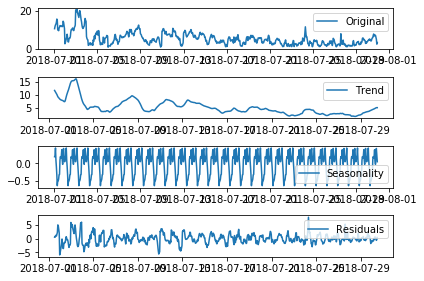

In [33]:
# Import seasonal_decompose 
from statsmodels.tsa.seasonal import seasonal_decompose

# Make a variable called decomposition, and assign it y passed to seasonal_decompose().  I use 12 periods because that is how many measurements I am using per day.
decomposition = seasonal_decompose(july, period = 24)

#is this the right seasonality to use?

# Make three variables for trend, seasonal and residual components respectively. 
# Assign them the relevant features of decomposition 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(july, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

# 3b. Testing for stationarity with KPSS

As you know, when doing time series analysis we always have to check for stationarity. Imprecisely, a time series dataset is stationary just if its statistical features don't change over time. A little more precisely, a stationary time series dataset will have constant mean, variance, and covariance.

There are many ways to test for stationarity, but one of the most common is the KPSS test. The Null hypothesis of this test is that the time series data in question is stationary; hence, if the p-value is less than the significance level (typically 0.05, but we decide) then we reject the Null and infer that the data is not stationary.

In [34]:
from statsmodels.tsa.stattools import kpss
kpss(july)

C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(1.6659344221457195,
 0.01,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

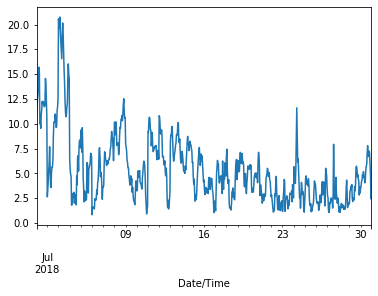

In [35]:
july.plot()

# Create Stationary Dataset

We now have a constant variance, but we also need a constant mean.

We can do this by differencing our data. We difference a time series dataset when we create a new time series comprising the difference between the values of our existing dataset.

Python is powerful, and we can use the diff() function to do this. You'll notice there's one less value than our existing dataset (since we're taking the difference between the existing values).

In [38]:
kpss(july.diff().dropna())

C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.020222651436651248,
 0.1,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

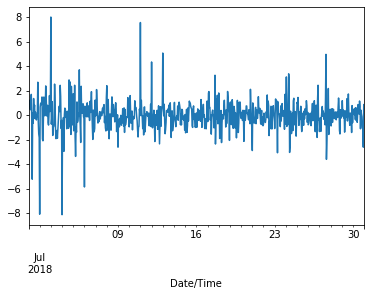

In [39]:
july.diff().plot()

All of the p-values appear to indicate that all of these datasets would be a random walk.

In [40]:
results = adfuller(july)
print(results)

(-5.432492065126933, 2.8936597629465727e-06, 1, 717, {'1%': -3.439503230053971, '5%': -2.8655794463678346, '10%': -2.5689210707289982}, 2204.938988120418)


In [41]:
results2 = adfuller(july_log)
print(results2)

(-6.276701183889944, 3.884801719540644e-08, 0, 718, {'1%': -3.439490435810785, '5%': -2.8655738086413374, '10%': -2.568918067209286}, 199.6488533353206)


In [42]:
results3= adfuller(july_log.diff(24).dropna())
print(results3)

(-6.542219628554016, 9.285649602020121e-09, 20, 674, {'1%': -3.4400894360545475, '5%': -2.865837730028723, '10%': -2.5690586760471605}, 661.3302892389895)


Our p-value is now greater than 0.05, so we can accept the null hypothesis that our data is stationary after taking both the natural log and the difference.   

# 3d. The ARIMA model
Recall that ARIMA models are based around the idea that it's possible to predict the next value in a time series by using information about the most recent data points. It also assumes there will be some randomness in our data that can't ever be predicted.

We can find some good parameters for our model using the sklearn and statsmodels libraries, and in particular mean_squared_error and ARIMA.

In [43]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [44]:
# Make a function called evaluate_arima_model to find the MSE of a single ARIMA model 
def evaluate_arima_model(data, arima_order):
    # Needs to be an integer because it is later used as an index.
    # Use int()
    split=int(len(data) * 0.8) 
    # Make train and test variables, with 'train, test'
    train, test= data[0:split], data[split:len(data)]
    past=[x for x in train]
    # make predictions
    predictions = list()
    for i in range(len(test)):#timestep-wise comparison between test data and one-step prediction ARIMA model. 
        model = ARIMA(past, order=arima_order)
        model_fit = model.fit(disp=0)
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    # Return the error
    return error

In [45]:
# Make a function called evaluate_models to evaluate different ARIMA models with several different p, d, and q values.
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p,d,q)
                try:
                    # Make a variable called mse for the Mean squared error
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print(order,mse)
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    return print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [46]:
# Now, we choose a couple of values to try for each parameter: p_values, d_values and q_values
# Fill in the blanks as appropriate
p_values = [x for x in range(0, 3)]
d_values = [x for x in range(0, 3)]
q_values = [x for x in range(0, 3)]

In [47]:
july.diff()

Date/Time
2018-07-01 01:00:00         NaN
2018-07-01 02:00:00    1.214581
2018-07-01 03:00:00    0.769775
2018-07-01 04:00:00    0.465558
2018-07-01 05:00:00    0.908240
                         ...   
2018-07-30 19:00:00   -0.106714
2018-07-30 20:00:00   -0.983080
2018-07-30 21:00:00   -1.128496
2018-07-30 22:00:00   -2.590861
2018-07-30 23:00:00    0.879159
Freq: H, Name: Wind Speed (m/s), Length: 719, dtype: float64

In [48]:

# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
import warnings
warnings.filterwarnings("ignore")
evaluate_models(july.diff().dropna(), p_values, d_values, q_values)

(0, 0, 0) 0.8938800987869896
ARIMA(0, 0, 0) MSE=0.894
(0, 0, 1) 0.9046955044212788
ARIMA(0, 0, 1) MSE=0.905
(0, 0, 2) 0.8840199998151496
ARIMA(0, 0, 2) MSE=0.884
(0, 1, 0) 1.7943013036350632
ARIMA(0, 1, 0) MSE=1.794
(0, 1, 1) 0.8977710603956537
ARIMA(0, 1, 1) MSE=0.898
(0, 1, 2) 0.9085597663270693
ARIMA(0, 1, 2) MSE=0.909
(0, 2, 0) 4.890824503811945
ARIMA(0, 2, 0) MSE=4.891
(0, 2, 1) 1.8005472703231808
ARIMA(0, 2, 1) MSE=1.801
(0, 2, 2) 0.9016079442706008
ARIMA(0, 2, 2) MSE=0.902
(1, 0, 0) 0.9057589109839596
ARIMA(1, 0, 0) MSE=0.906
(1, 0, 1) 0.8922506896987965
ARIMA(1, 0, 1) MSE=0.892
(1, 0, 2) 0.8517687438632232
ARIMA(1, 0, 2) MSE=0.852
(1, 1, 0) 1.5277156855372072
ARIMA(1, 1, 0) MSE=1.528
(1, 1, 1) 0.9098874794933999
ARIMA(1, 1, 1) MSE=0.910
(1, 1, 2) 0.8814715065304601
ARIMA(1, 1, 2) MSE=0.881
(1, 2, 0) 3.3313160469007146
ARIMA(1, 2, 0) MSE=3.331
(2, 0, 0) 0.8847602376073489
ARIMA(2, 0, 0) MSE=0.885
(2, 0, 1) 0.8948953082470992
ARIMA(2, 0, 1) MSE=0.895
(2, 0, 2) 0.8485282397359503


In [49]:
p=2
d=0
q=2
model = ARIMA(july.diff().dropna(), order=(p,d,q))
model_fit = model.fit()
forecast = model_fit.forecast(24)

In [50]:
#Call summary() on model_fit
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       Wind Speed (m/s)   No. Observations:                  718
Model:                     ARMA(2, 2)   Log Likelihood               -1134.442
Method:                       css-mle   S.D. of innovations              1.172
Date:                Thu, 26 Nov 2020   AIC                           2280.884
Time:                        09:20:09   BIC                           2308.342
Sample:                    07-01-2018   HQIC                          2291.485
                         - 07-30-2018                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0093      0.002     -4.352      0.000      -0.013      -0.005
ar.L1.Wind Speed (m/s)     0.6673      0.272      2.449      0.014       0.133       1.201
ar.L2.Wind Speed (m/s)     0.2025      0.252      0.805      0.421      -0.290       0.695
ma.L1.Wind Speed (m/s)    -0.6321      0.262     -2.409      0.016      -1.146      -0.118
ma.L2.Wind Speed (m/s)    -0.3679      0.262     -1.402      0.161      -0.882       0.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1188           +0.0000j            1.1188            0.0000
AR.2           -4.4143           +0.0000j            4.4143            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -2.7181           +0.0000j            2.7181            0.5000
-----------------------------------------------------------------------------
"""

# 3e. Visualize the results

Visualize the original dataset plotted against our model.

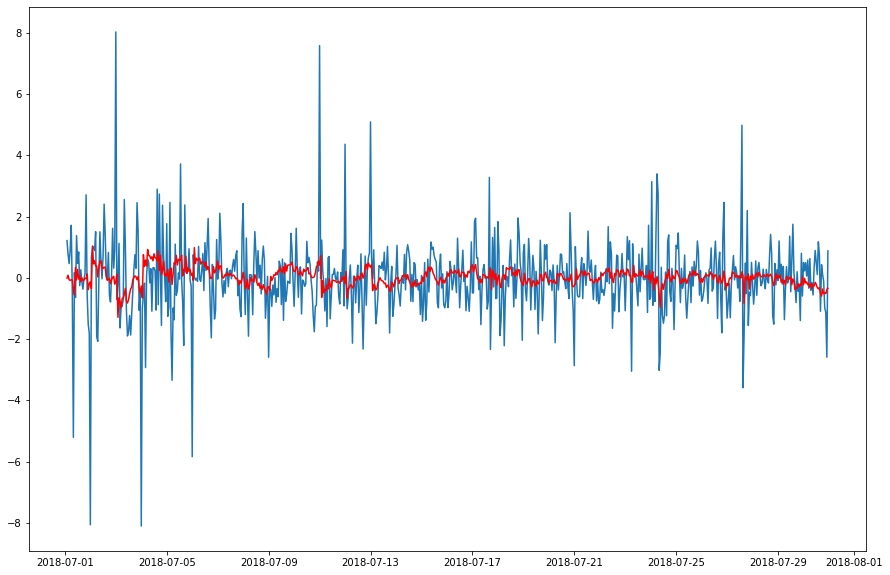

In [51]:

# Call figure() and plot() on the plt
plt.figure(figsize=(15,10))
plt.plot(july.diff())
plt.plot(model_fit.predict(), color = 'red')

# 3f. Application: Forecasting

We've done well: our model fits pretty closely to our existing data. Let's now use it to forecast what's likely to occur in future.

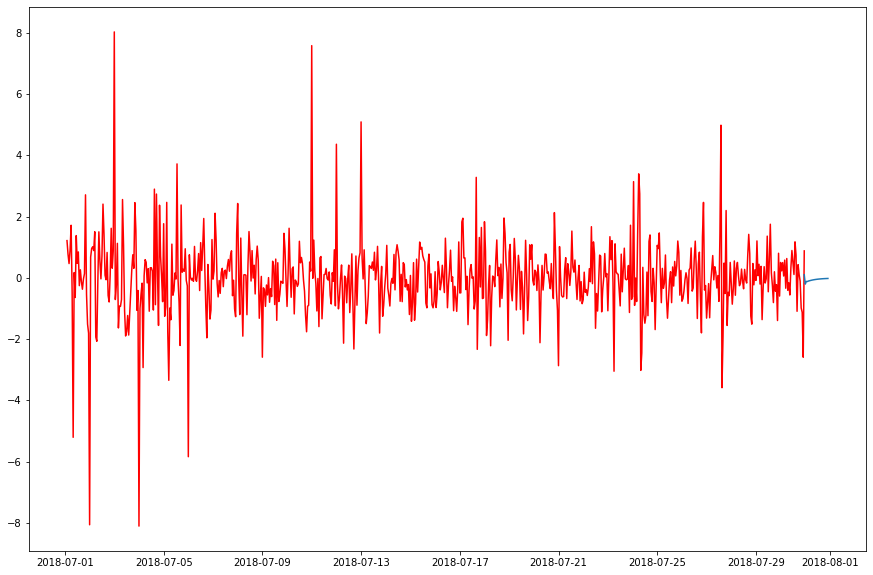

In [52]:
# Declare a variable called forecast_period with the amount of 1 hour increments to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = 24
date_range = pd.date_range(july.index[-1], periods = forecast_period, 
              freq='H').strftime("%Y-%m-%d, %h-%m-%s").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_months = pd.DataFrame(date_range, columns = ['Date/Time'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['Date/Time'] = pd.to_datetime(future_months['Date/Time'])
future_months.set_index('Date/Time', inplace = True)
future_months['Prediction'] = forecast[0]

# Plot your future predictions
# Call figure() on plt
plt.figure(figsize=(15,10))
plt.plot(july.diff(), color = 'r')
plt.plot(future_months['Prediction'])
plt.show()

#  Results

The results here are not very encouraging.  If we had used this ARIMA model to forecast our data from July 30th to August 9th using all of our July data as a baseline, we would not have created a very accurate forecast.  This has been a good exercise in using all of the tools from our curriculum, but in practice, I would need to use a larger set of base data before creating a forecast I think.  Also I would be curious how I can create a forecast that would imbed the seasonality of this data into it.  

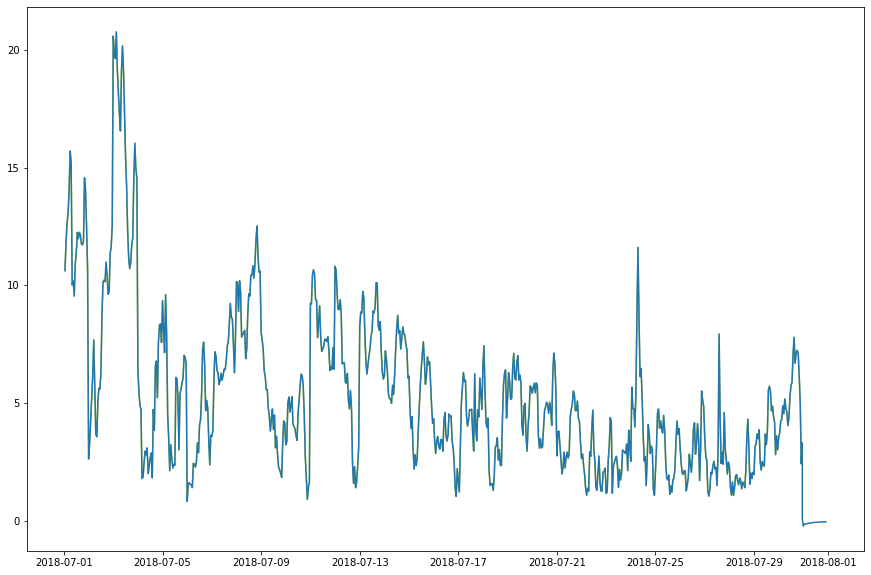

In [53]:
# Declare a variable called forecast_period with the amount of 1 hour increments to forecast, and
# create a range of future dates that is the length of the periods you've chosen to forecast
forecast_period = 24
date_range = pd.date_range(july.index[-1], periods = forecast_period, 
              freq='H').strftime("%Y-%m-%d, %h-%m-%s").tolist()

# Convert that range into a dataframe that includes your predictions
# First, call DataFrame on pd
future_months = pd.DataFrame(date_range, columns = ['Date/Time'])
# Let's now convert the 'Month' column to a datetime object with to_datetime 
future_months['Date/Time'] = pd.to_datetime(future_months['Date/Time'])
future_months.set_index('Date/Time', inplace = True)
future_months['Prediction'] = forecast[0]

# Plot your future predictions
# Call figure() on plt
plt.figure(figsize=(15,10))
plt.plot(july, color = 'y')
plt.plot(july.append(future_months['Prediction']))
plt.show()

# Modeling with Prophet Package

https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/

In [56]:
!pip install pystan
!pip install fbprophet

In [135]:
from fbprophet import Prophet

In [136]:
july.columns = ['ds', 'y']

In [146]:
df = pd.DataFrame({'ds':july.index, 'y':july.values})

model1 = Prophet()

model1.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [147]:
df.tail()

,ds,y
714,2018-07-30 19:00:00,7.141817
715,2018-07-30 20:00:00,6.158737
716,2018-07-30 21:00:00,5.030241
717,2018-07-30 22:00:00,2.439380
718,2018-07-30 23:00:00,3.318539


In [150]:
# define the period for which we want a prediction
from datetime import timedelta as td, datetime

start_date = '2018-07-29'
end_date = '2018-07-30'
d1 = datetime.strptime(start_date, '%Y-%m-%d')
d2 = datetime.strptime(end_date, '%Y-%m-%d')

def get_delta(d1, d2):
    delta = d2 - d1
    return delta

future = list()

delta = get_delta(d1,d2)
for i in range(delta.days * 48 + 1):
    future.append(d1 + td(hours=i))

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

# Create In-Sample Forecast

                    ds      yhat  yhat_lower  yhat_upper
44 2018-07-30 20:00:00  3.717988    0.363053    7.425588
45 2018-07-30 21:00:00  3.797045    0.429990    7.171857
46 2018-07-30 22:00:00  3.770991    0.324889    7.280811
47 2018-07-30 23:00:00  3.713499    0.069293    7.100482
48 2018-07-31 00:00:00  3.741776    0.405231    7.372185


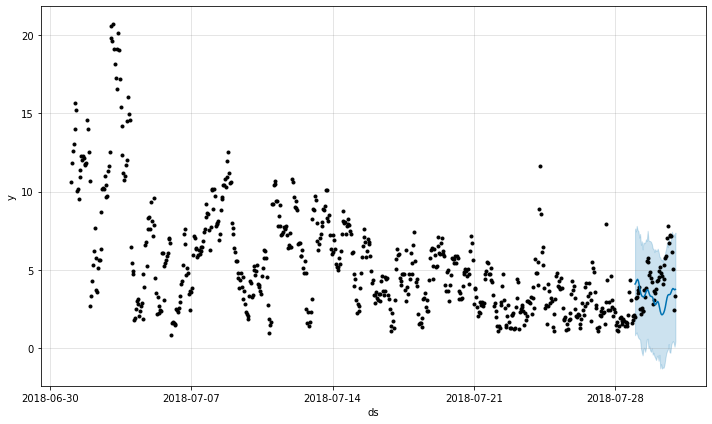

In [151]:
forecast1 = model1.predict(future)
# summarize the forecast
print(forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
# plot forecast
model1.plot(forecast1)
plt.show()

# Create Out of Sample Forecast

In [152]:
# define the period for which we want a prediction
from datetime import timedelta as td, datetime

start_date = '2018-07-31'
end_date = '2018-08-01'
d1 = datetime.strptime(start_date, '%Y-%m-%d')
d2 = datetime.strptime(end_date, '%Y-%m-%d')

def get_delta(d1, d2):
    delta = d2 - d1
    return delta

future = list()

delta = get_delta(d1,d2)
for i in range(delta.days * 48 + 1):
    future.append(d1 + td(hours=i))

future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

                   ds      yhat  yhat_lower  yhat_upper
0 2018-07-31 00:00:00  3.741776    0.233409    7.355337
1 2018-07-31 01:00:00  3.905116    0.430253    7.264530
2 2018-07-31 02:00:00  4.129400    0.533054    7.419860
3 2018-07-31 03:00:00  4.271355    0.922538    7.830352
4 2018-07-31 04:00:00  4.234579    1.012752    7.448845


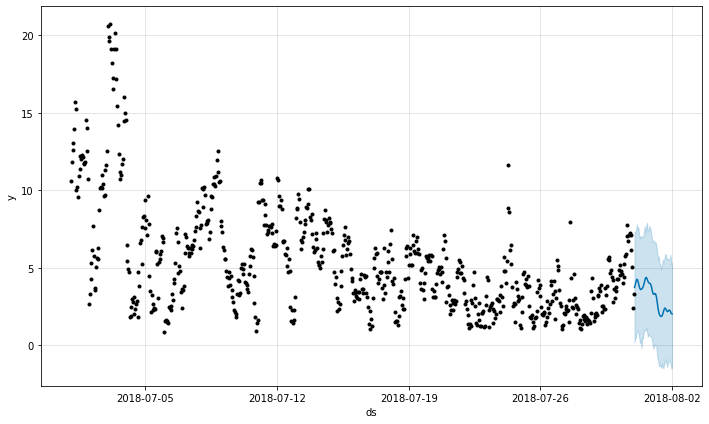

In [153]:
forecast2 = model1.predict(future)
# summarize the forecast
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model1.plot(forecast2)
plt.show()

# Manually Evaluate Forecast Model

In [154]:
# create test dataset, remove last 2 days
train = df.drop(df.index[-48:])
print(train.tail())

                     ds         y
666 2018-07-28 19:00:00  3.084877
667 2018-07-28 20:00:00  1.572593
668 2018-07-28 21:00:00  2.040446
669 2018-07-28 22:00:00  1.812334
670 2018-07-28 23:00:00  2.073747


A forecast can then be made on the last 24 hours of date-times.

We can then retrieve the forecast values and the expected values from the original dataset and calculate a mean absolute error metric using the scikit-learn library.

In [159]:
y_true = df['y'][-48:].values
y_pred = forecast1['yhat'][0:48].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1.688


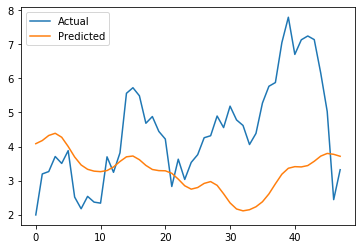

In [161]:
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()